In [47]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl

#import sys
#sys.path.append('../sanode') # Adds higher directory to python modules path.
#import aicsPlot
#aicsPlot.defaultPlotLayout(plotForTalk=False)


In [48]:
def defaultSeabornLayout(plotForTalk=False):
    if plotForTalk:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')

    fontSize = 10
    if plotForTalk: fontSize = 14

    mpl.rcParams['figure.figsize'] = [2.0, 3.0]
    mpl.rcParams['lines.linewidth'] = 1.0
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.labelsize'] = fontSize # font size of x/y axes labels (not ticks)
    mpl.rcParams['xtick.labelsize']=fontSize
    mpl.rcParams['ytick.labelsize']=fontSize
    
plotForTalk = False
defaultSeabornLayout(plotForTalk=plotForTalk)

## Plot density of vascular mask

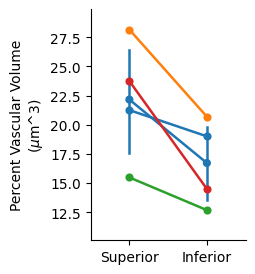

In [50]:
# plot the density of a mask (e.g. vascular mask)
path = 'Density-Result-ch2.csv'
df = pd.read_csv(path)

# decide which of head/mid/tail to plot
theseRegions = ['head', 'tail']
df = df[df['headMidTail'].isin(theseRegions)]
yStatName = 'vMaskPercent' # (median, mean)

fig, ax = plt.subplots(1)

#sns.catplot(ax=ax, x='headMidTail', y=yStatName, hue='SAN', kind="point", data=df)
sns.pointplot(ax=ax, x='headMidTail', y=yStatName, hue='SAN', scatter_kws={"s": 2}, data=df)

#sns.pointplot(ax=ax, x='headMidTail', y=yStatName, scatter_kws={"s": 2}, data=df)

ax.set_ylim([10.1, 29.9])
ax.set_ylabel('Percent Vascular Volume\n($\mu$m^3)')
ax.set_xlabel('')
regionList2 = ['Superior', 'Inferior']
plt.xticks([0, 1], regionList2)
ax.get_legend().remove()

<AxesSubplot:xlabel='headMidTail', ylabel='vMaskPercent'>

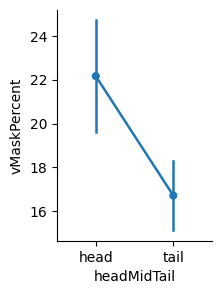

In [53]:
# if I drop hue, I get mean +/- some error (not sure which error, Std or SEM?)
# what does ci=68 do?
fig, ax = plt.subplots(1)
sns.pointplot(ax=ax, x='headMidTail', y=yStatName, scatter_kws={"s": 2}, ci=68, data=df)


## Plot the mean/median of HCN4 pixels to closest vasculature

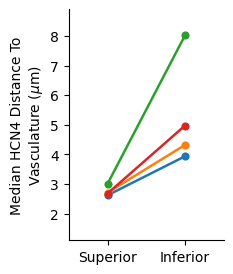

In [54]:
path = 'hcn4-Distance-Result.csv'
df = pd.read_csv(path)

# decide which of head/mid/tail to plot
theseRegions = ['head', 'tail']
df2 = df[df['headMidTail'].isin(theseRegions)]
yStatName = 'median' # (median, mean)

fig, ax = plt.subplots(1)

#axSeaborn = sns.catplot(x='headMidTail', y=yStatName, hue='SAN', kind="point", data=df)
axSeaborn = sns.pointplot(ax=ax, x='headMidTail', y=yStatName, hue='SAN', kind="point", data=df2)

ax.set_ylim([1.1, 8.9])
yStatLabel = yStatName[0].upper() + yStatName[1:]
yLabel = f'{yStatLabel} HCN4 Distance To\nVasculature ($\mu$m)'
ax.set_ylabel(yLabel)
ax.set_xlabel('')
regionList2 = ['Superior', 'Inferior']
plt.xticks([0, 1], regionList2)
ax.get_legend().remove()

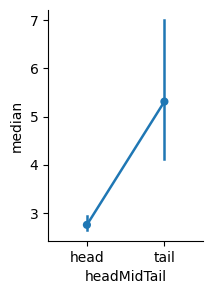

In [55]:
fig, ax = plt.subplots(1)
axSeaborn = sns.pointplot(ax=ax, x='headMidTail', y=yStatName, data=df2)


In [24]:
# load hcn4Dist.csv .. this takes a few seconds
path = 'hcn4Dist.csv'
dfDist = pd.read_csv(path)

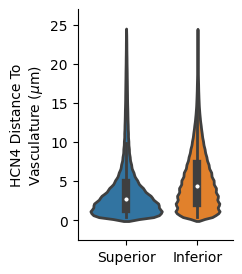

In [46]:

sanStr = 'SAN2'
regionList = ['tail', 'head'] # to get logical order head-tail in plot

df2 = dfDist[ dfDist['SAN'] == sanStr]
df2 = df2[ df2['headMidTail'].isin(regionList) ]

fig, ax = plt.subplots(1)

split = False
linewidth = 2
ax = sns.violinplot(ax=ax, x="SAN", y="hcn4DistToVasc", hue='headMidTail', linewidth=linewidth, split=split, data=df2)

ax.set_ylabel('HCN4 Distance To\nVasculature ($\mu$m)')
ax.set_xlabel('')
ax.margins(x=0.1, y=0.1)
regionList2 = ['Superior', 'Inferior']
plt.xticks([-0.2, .2], regionList2)

plt.legend(frameon=False)
ax.get_legend().remove()